In [22]:
import os
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [24]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]  # Ignore punctuation
    return lemmatized_tokens

def process_books(directory="downloaded_books"):
    unified_vocabulary = {}
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                lemmatized_tokens = tokenize_and_lemmatize(text)
                for token in lemmatized_tokens:
                    unified_vocabulary[token] = unified_vocabulary.get(token, 0) + 1
        except FileNotFoundError:
            print(f"Error: {filename} not found in {directory}")
        except OSError as e:
            print(f"Error reading {filename}: {e}")

    return unified_vocabulary

# Process the books and create a unified vocabulary
vocabulary = process_books()

# Sort and display the top 100 words by frequency
vocabulary = sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)
print("Top 100 words in the downloaded books:")
for word, freq in vocabulary[:100]:
    print(f"{word}: {freq}")

Top 100 words in the downloaded books:
the: 153898
of: 97619
to: 96664
and: 96274
a: 94100
I: 70335
in: 54990
that: 42800
wa: 36177
his: 35919
he: 34156
with: 32679
you: 32406
it: 31904
my: 30270
her: 29121
not: 28712
for: 28057
had: 26241
is: 24019
be: 23400
me: 21275
s: 20157
have: 20037
him: 19227
at: 19165
this: 18923
she: 18916
which: 18088
on: 16878
by: 16797
but: 16316
all: 14619
so: 14607
from: 12902
your: 12298
The: 12162
And: 11931
will: 11124
would: 11090
said: 10780
no: 10226
an: 9861
were: 9823
one: 9811
who: 9775
are: 9752
they: 9257
we: 9116
if: 8682
do: 8533
or: 8249
been: 8176
what: 8159
more: 8153
their: 7830
when: 7642
But: 7625
them: 7582
very: 7158
than: 6933
there: 6838
now: 6834
He: 6833
could: 6778
our: 6728
out: 6434
man: 6425
some: 6362
time: 6244
up: 6125
such: 6078
upon: 6056
shall: 6053
good: 6029
should: 5965
d: 5914
did: 5904
can: 5873
know: 5835
thou: 5796
any: 5687
am: 5659
like: 5647
into: 5636
then: 5528
much: 5282
say: 5190
It: 5075
must: 4988
little

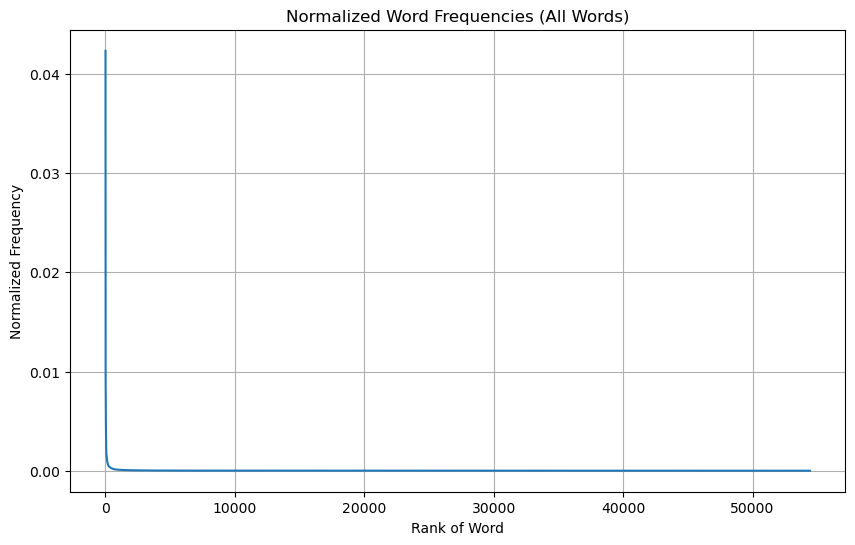

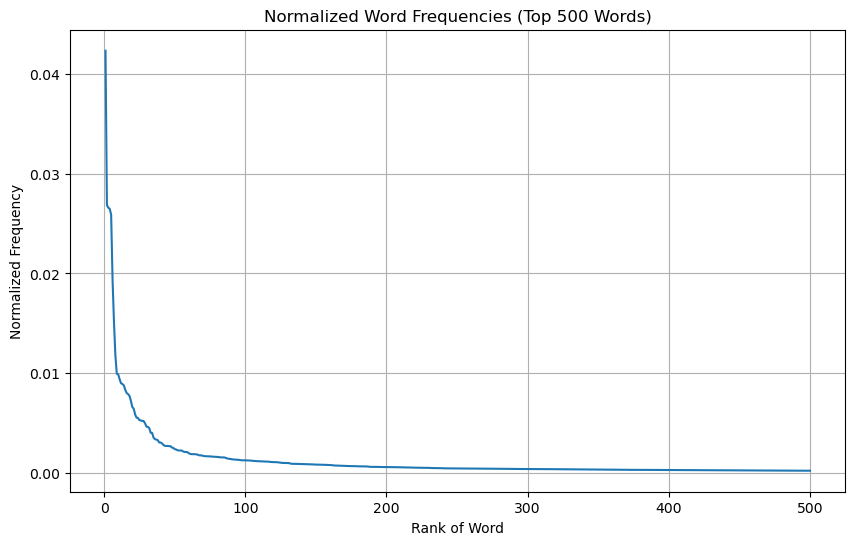

In [27]:
ranks = np.arange(1, len(vocabulary) + 1)
total_freq = sum(freq for _, freq in vocabulary)
frequencies = [freq/total_freq for word, freq in vocabulary]

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies)
plt.title('Normalized Word Frequencies (All Words)')
plt.xlabel('Rank of Word')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ranks[:500],frequencies[:500])
plt.title('Normalized Word Frequencies (Top 500 Words)')
plt.xlabel('Rank of Word')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()

In [ ]:
ranks = np.arange(1, len(vocabulary) + 1)
total_freq = sum(freq for _, freq in vocabulary)
frequencies = [freq/total_freq for word, freq in vocabulary]

plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies)
plt.title('Normalized Word Frequencies (All Words)')
plt.xlabel('Rank of Word')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ranks[:500],frequencies[:500])
plt.title('Normalized Word Frequencies (Top 500 Words)')
plt.xlabel('Rank of Word')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()

C:\Users\EmmaK\AppData\Local\Temp\ipykernel_6920\1419452191.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, max(frequencies) * 1.1)


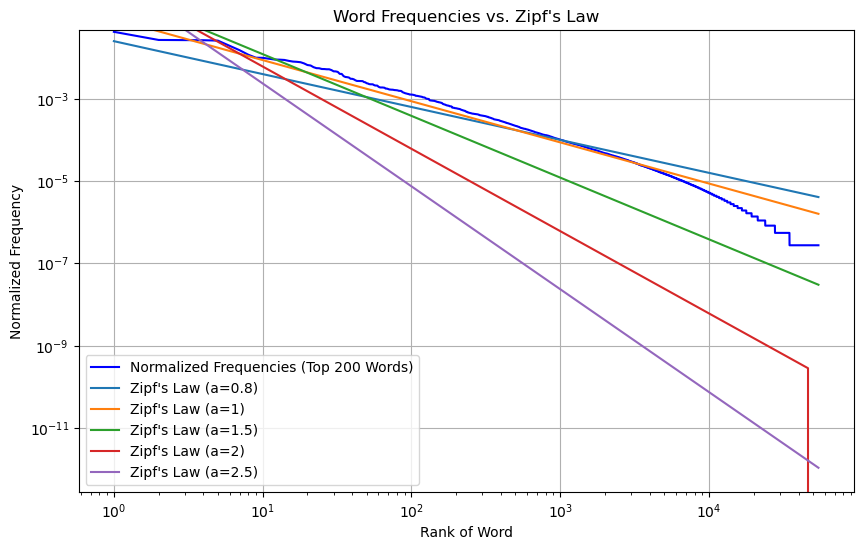

In [ ]:
ranks = np.arange(1, len(vocabulary) + 1)

total_freq = sum(freq for _, freq in vocabulary)
frequencies = np.array([freq / total_freq for _, freq in vocabulary])

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, label='Normalized Frequencies (Top 200 Words)', color='blue')

for a in [1, 1.5, 2, 2.5]:
    zipf_frequencies = (1 / ranks ** a)
    zipf_frequencies /= np.sum(zipf_frequencies)
    plt.loglog(ranks, zipf_frequencies, label=f'Zipf\'s Law (a={a})')

plt.title('Word Frequencies vs. Zipf\'s Law')
plt.xlabel('Rank of Word')
plt.ylabel('Normalized Frequency')
plt.ylim(0, max(frequencies) * 1.1)
plt.grid(True)
plt.legend()
plt.show()